<h1 align=center >Feature Extraction</h1>

The `sklearn.feature_extraction` module can be used to extract features in a format supported by machine learning algorithms from datasets consisting of formats such as text and image.

**Note:**

Feature extraction is very different from `Feature selection`: the former consists in transforming arbitrary data, such as `text` or `images`, into numerical features usable for machine learning. The latter is a machine learning technique applied on these features.

### Different TechTechniques for Feature Extraction
1. **Text:** The text submodule gathers utilities to build feature vectors from text documents.
    * CountVectorizer
    * TfidfVectorizer
    * TfidfTransformer 
    * HashingVectorizer 
2. **Image**
    * extract_patches_2d 
    * grid_to_graph 
    * PatchExtractor 
    * img_to_graph 
    * extract_patches 
    * reconstruct_from

### Loading features from dicts

The class `DictVectorizer` can be used to convert feature arrays represented as lists of standard Python dict objects to the NumPy/SciPy representation used by scikit-learn estimators.

While not particularly fast to process, Python’s dict has the advantages of being convenient to use, being sparse (absent features need not be stored) and storing feature names in addition to values.

DictVectorizer implements what is called `one-of-K or “one-hot”` coding for categorical (aka nominal, discrete) features. Categorical features are `“attribute-value”` pairs where the value is restricted to a list of discrete of possibilities without ordering (e.g. topic identifiers, types of objects, tags, names…).

In the following, “city” is a categorical attribute while “temperature” is a traditional numerical feature:

In [1]:
measurements = [
    {'city': 'Dubai', 'temperature': 33.},
    {'city': 'London', 'temperature': 12.},
    {'city': 'San Francisco', 'temperature': 18.},
    {'city': 'India', 'temperature': 28.}
]
measurements

[{'city': 'Dubai', 'temperature': 33.0},
 {'city': 'London', 'temperature': 12.0},
 {'city': 'San Francisco', 'temperature': 18.0},
 {'city': 'India', 'temperature': 28.0}]

In [2]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
vec

DictVectorizer()

In [3]:
vec.fit_transform(measurements).toarray()

array([[ 1.,  0.,  0.,  0., 33.],
       [ 0.,  0.,  1.,  0., 12.],
       [ 0.,  0.,  0.,  1., 18.],
       [ 0.,  1.,  0.,  0., 28.]])

In [4]:
vec.get_feature_names()

['city=Dubai',
 'city=India',
 'city=London',
 'city=San Francisco',
 'temperature']

In [5]:
vec.feature_names_

['city=Dubai',
 'city=India',
 'city=London',
 'city=San Francisco',
 'temperature']

In [6]:
vec.vocabulary_

{'city=Dubai': 0,
 'temperature': 4,
 'city=London': 2,
 'city=San Francisco': 3,
 'city=India': 1}

In [27]:
pos_windows = [
    {
        'word-2':'the',
        'pos-2':'DT',
        'world -1':'Cat',
        'pos-1':'NN',
        'word+1':'on',
        'pos+1':'pp',
        'ÿ':'pp',
        "Pop":"Reddy"
        
    }
              ]

In [34]:
ord('P'),ord('p')

(80, 112)

In [30]:
vec = DictVectorizer()
vec

DictVectorizer()

In [31]:
pos_vectorization  = vec.fit_transform(pos_windows)
pos_vectorization.toarray()

array([[1., 1., 1., 1., 1., 1., 1., 1.]])

In [32]:
vec.get_feature_names()

['Pop=Reddy',
 'pos+1=pp',
 'pos-1=NN',
 'pos-2=DT',
 'word+1=on',
 'word-2=the',
 'world -1=Cat',
 'ÿ=pp']

In [33]:
vec.vocabulary_

{'word-2=the': 5,
 'pos-2=DT': 3,
 'world -1=Cat': 6,
 'pos-1=NN': 2,
 'word+1=on': 4,
 'pos+1=pp': 1,
 'ÿ=pp': 7,
 'Pop=Reddy': 0}

In [14]:
ord('-')

45

In [15]:
ord('+')

43

In [17]:
chr(43)

'+'

### CountVectorizer

Convert a collection of text documents to a matrix of token counts

This implementation produces a sparse representation of the counts using scipy.sparse.coo_matrix.

If you do not provide an a-priori dictionary and you do not use an analyzer that does some kind of feature selection then the number of features will be equal to the vocabulary size found by analyzing the data.

![](https://lh3.googleusercontent.com/-v7Z2-GpVjz8/XuGU9z2iiiI/AAAAAAAAomE/oZnEq3Qicdk_vLM1aXiL5oyRnzhLmSB5wCK8BGAsYHg/s0/2020-06-10.png)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog"]

In [13]:
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)

CountVectorizer()

In [14]:
# summarize
print(vectorizer.vocabulary_)

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}


In [15]:
# encode document
vector = vectorizer.transform(text)

In [17]:
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

(1, 8)
<class 'scipy.sparse.csr.csr_matrix'>
[[1 1 1 1 1 1 1 2]]


In [18]:
# encode another document
text2 = ["the puppy"]
vector = vectorizer.transform(text2)
print(vector.toarray())

[[0 0 0 0 0 0 0 1]]


#### Example-2


In [19]:
sample_text = ["One of the most basic ways we can numerically represent words "
               "is through the one-hot encoding method (also sometimes called "
               "count vectorizing)."]

In [20]:
vectorizer.fit(sample_text)

CountVectorizer()

In [21]:
print('Vocabulary: ')
print(vectorizer.vocabulary_)

Vocabulary: 
{'one': 12, 'of': 11, 'the': 15, 'most': 9, 'basic': 1, 'ways': 18, 'we': 19, 'can': 3, 'numerically': 10, 'represent': 13, 'words': 20, 'is': 7, 'through': 16, 'hot': 6, 'encoding': 5, 'method': 8, 'also': 0, 'sometimes': 14, 'called': 2, 'count': 4, 'vectorizing': 17}


In [22]:
vector = vectorizer.transform(sample_text)

In [23]:
# Our final vector:
print('Full vector: ')
print(vector.toarray())

Full vector: 
[[1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1]]


In [25]:
# Or if we wanted to get the vector for one word:
print('Hot vector: ')
print(vectorizer.transform(['hot']).toarray())

Hot vector: 
[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [26]:
# Or if we wanted to get multiple vectors at once to build matrices
print('Hot and one: ')
print(vectorizer.transform(['hot', 'one']).toarray())

Hot and one: 
[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]]


In [27]:
# We could also do the whole thing at once with the fit_transform method:
print('One swoop:')
new_text = ['Today is the day that I do the thing today, today']
new_vectorizer = CountVectorizer()
print(new_vectorizer.fit_transform(new_text).toarray())

One swoop:
[[1 1 1 1 2 1 3]]


## Image Feature Extraction

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
from sklearn.feature_extraction import image

In [39]:
array = np.arange(4*4*3).reshape((4,4,3))
array

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]],

       [[24, 25, 26],
        [27, 28, 29],
        [30, 31, 32],
        [33, 34, 35]],

       [[36, 37, 38],
        [39, 40, 41],
        [42, 43, 44],
        [45, 46, 47]]])

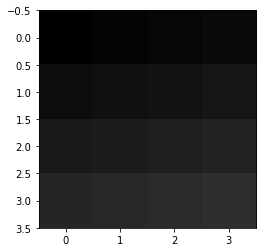

In [40]:
plt.imshow(array)

In [44]:
array[:,:,0]

array([[ 0,  3,  6,  9],
       [12, 15, 18, 21],
       [24, 27, 30, 33],
       [36, 39, 42, 45]])

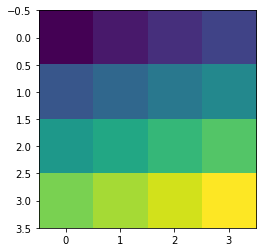

In [43]:
plt.imshow(array[:,:,0])

In [45]:
array.shape

(4, 4, 3)

In [50]:
patches = image.extract_patches_2d(array,(2,2),max_patches=2,random_state=0)
patches

array([[[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[12, 13, 14],
         [15, 16, 17]]],


       [[[15, 16, 17],
         [18, 19, 20]],

        [[27, 28, 29],
         [30, 31, 32]]]])

In [47]:
patches.shape

(2, 2, 2, 3)

In [51]:
patches[:,:,:,0]

array([[[ 0,  3],
        [12, 15]],

       [[15, 18],
        [27, 30]]])

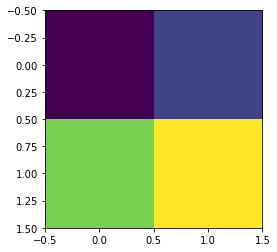

In [52]:
plt.imshow(patches[:,:,:,0][0])

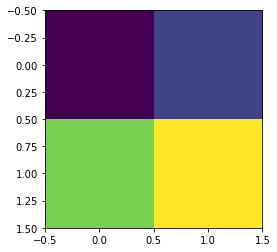

In [53]:
plt.imshow(patches[:,:,:,0][1])

In [54]:
patches = image.extract_patches_2d(img,(3,3),max_patches=2,random_state=0)
patches.shape

(2, 3, 3, 3)

In [55]:
reconstruct  = image.reconstruct_from_patches_2d(patches,(4,4,3)) 
reconstruct.shape

(4, 4, 3)

In [58]:
p = image.PatchExtractor(patch_size=(2,2)).transform(img)

In [59]:
p.shape

(24, 2, 2)

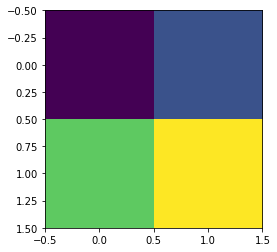

In [60]:
plt.imshow(p[0])

#### Feature hashing
The class FeatureHasher is a high-speed, low-memory vectorizer that uses a technique known as feature hashing, or the “hashing trick”. Instead of building a hash table of the features encountered in training, as the vectorizers do, instances of FeatureHasher apply a hash function to the features to determine their column index in sample matrices directly. The result is increased speed and reduced memory usage, at the expense of inspectability; the hasher does not remember what the input features looked like and has no inverse_transform method.

![](https://lh3.googleusercontent.com/-dULxt0dtIQY/XuGc3TOy1vI/AAAAAAAAomQ/EqrbctojhsM7dNDuDuLOpcOHP5ORwXv2QCK8BGAsYHg/s0/2020-06-10.png)

* John likes to watch movies.
* Mary likes movies too.
* John also likes football.

|Term|Index|
|----|---|
|John|1|
|likes|2|
|to|3|
|watch|4|
|movies|5|
|Mary|6|
|too|7|
|also|8|
|football|9|

![](https://lh3.googleusercontent.com/-7EK06T5PlZM/XuGd82LfcgI/AAAAAAAAomY/dueH8562uYMqTLlPQ7B1piZaQg0Wu3_KgCK8BGAsYHg/s0/2020-06-10.png)

In [30]:
D = [{'dog': 1, 'cat':2, 'elephant':4},{'dog': 2, 'run': 5}]

In [37]:
from sklearn.feature_extraction import FeatureHasher
h = FeatureHasher(n_features=4)

In [38]:
f = h.transform(D)

In [39]:
f.toarray()

array([[ 0., -1., -4.,  2.],
       [-5., -2.,  0.,  0.]])

### Image to Array

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow

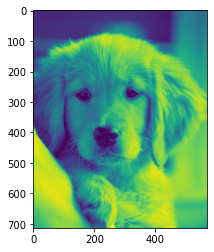

In [44]:
image = imread("https://lh3.googleusercontent.com/-_IhN8XKahhs/XuGgbzq1gBI/AAAAAAAACXU/eWOCCKjOZXk4-93yA8DCPavg1pRmOA6-gCK8BGAsYHg/s0/2020-06-10.jpg",
            as_gray=True)
plt.imshow(image)

In [45]:
image.shape

(713, 570)

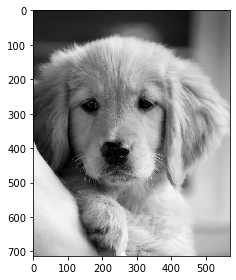

In [46]:
imshow(image)

In [47]:
print(image)

[[0.11615882 0.11615882 0.11615882 ... 0.38681255 0.39073412 0.39073412]
 [0.10831569 0.10831569 0.11223725 ... 0.38681255 0.39073412 0.39073412]
 [0.10831569 0.11223725 0.11223725 ... 0.39073412 0.39465569 0.39465569]
 ...
 [0.58769843 0.59554157 0.60730627 ... 0.57591882 0.57199725 0.57199725]
 [0.56809059 0.57593373 0.58377686 ... 0.56807569 0.56415412 0.56415412]
 [0.57201216 0.57985529 0.58769843 ... 0.56415412 0.56807569 0.56807569]]


In [49]:
features = np.reshape(image, (713*570))
features.shape

(406410,)

In [50]:
features

array([0.11615882, 0.11615882, 0.11615882, ..., 0.56415412, 0.56807569,
       0.56807569])

In [51]:
from skimage.filters import prewitt_h,prewitt_v

In [55]:
#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(image)

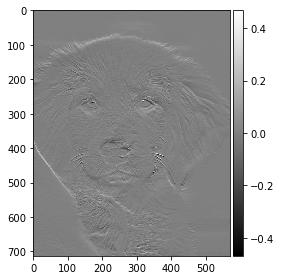

In [56]:
imshow(edges_prewitt_horizontal, cmap='gray')

In [53]:
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(image)

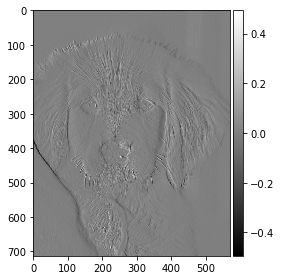

In [54]:
imshow(edges_prewitt_vertical, cmap='gray')